<a href="https://colab.research.google.com/github/Ludmila-Vivas/Aprendizaje-Automatico-1/blob/main/Regresi%C3%B3n_lineal_multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🔸 Regresión lineal multiple**

El objetivo del ejercicio consiste en predecir **cuantas calorías quema una persona en función de los minutos que corre, la velocidad a la que corre y su peso corporal**. Por ello tenemos un conjunto de datos tomados de forma empírica que nos dan esa relación.

In [27]:
#Importamos las galerias necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error

**✅ Carga y división de datos**

*DataSet:* "calories_time_weight_speed.csv"

Alojado en https://raw.githubusercontent.com/anadiedrichs/curso-aprendizaje-automatico/main/datasets/calories_time_weight_speed.csv

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/anadiedrichs/curso-aprendizaje-automatico/main/datasets/calories_time_weight_speed.csv")
df.sample(5)

,Calorias,Tiempo,Peso,Velocidad
4775,1208.6,71.6,80.3,12.2
2116,905.9,44.2,81.0,14.7
2604,479.0,30.9,69.7,12.9
2863,164.9,10.1,65.9,14.3
4209,787.5,46.9,73.9,13.2


In [29]:
x = df[['Tiempo', 'Velocidad', 'Peso']].values
y = df['Calorias'].values

In [30]:
#Dividimos los datos en train/test

np.random.seed(2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

**✅ Generación y evalucaión del modelo**

In [31]:
reg_mul = linear_model.LinearRegression()
reg_mul.fit(x_train, y_train)

LinearRegression()

In [32]:
#Modelo con los datos de entrenamiento
y_predict = reg_mul.predict(x_train)

mae_train = mean_absolute_error(y_true=y_train, y_pred=y_predict)
mse_train = mean_squared_error(y_true=y_train, y_pred=y_predict)

print("Error Absoluto Medio (MAE): {error}".format(error=mae_train))
print("Error Cuadrático Medio (MSE): {error}".format(error=mse_train))

Error Absoluto Medio (MAE): 48.14348666783384
Error Cuadrático Medio (MSE): 4425.892283745691


In [33]:
#Modelo con los datos de testeo
y_predict = reg_mul.predict(x_test)

mae_test = mean_absolute_error(y_true=y_test, y_pred=y_predict)
mse_test = mean_squared_error(y_true=y_test, y_pred=y_predict)

print("Error Absoluto Medio (MAE): {error}".format(error=mae_test))
print("Error Cuadrático Medio (MSE): {error}".format(error=mse_test))

Error Absoluto Medio (MAE): 48.44305689079671
Error Cuadrático Medio (MSE): 4508.549637473967


**✅ Conclusiones**

Vemos que el índice de error es similar entre el entrenamiento y el test, esto nos indica que el modelo es estable y generaliza bien.
También se observa que el MAE es de 48 aproximadamente, es decir, que al utilizarse el modelo puede haber un error de 48 calorías.



# **🔸 Cross Validation**

In [34]:
#Compruebo el dataframe y los cambio a arrays de nuevo
df.sample(5)

,Calorias,Tiempo,Peso,Velocidad
1430,716.9,40.8,84.9,12.0
1611,430.2,27.1,78.5,11.7
92,116.1,7.4,63.0,14.4
4033,643.6,33.1,73.5,15.3
527,601.3,46.1,64.1,11.8


In [35]:
x = df[['Tiempo', 'Velocidad', 'Peso']].values
y = df['Calorias'].values

**✅'N' Particionados de datos en Entrenamiento y Test**

En este caso no vamos a obtener unos arrays con los datos de entrenamiento y test; si no, los índices de los elementos del Dataset que en cada paso actuarán como entrenamiento y como test.

In [37]:
#Se divide el dataset en '10' conjuntos de datos.

k_fold = KFold(n_splits=10)

**✅ Generación y evalución del modelo**

In [38]:
from re import L
l_mae_train = []
l_mae_test = []

#Creo y ajusto el modelo
for train, test in k_fold.split(x,y):
  reg_mul = linear_model.LinearRegression()
  reg_mul.fit(x[train], y[train])
  print("\nCalorias = {b0:0.2f} + {b1:0.2f} Tiempo + {b2:0.2f} Velocidad + {b3:0.2f} Peso"
  .format(b0=reg_mul.intercept_, b1=reg_mul.coef_[0], b2=reg_mul.coef_[1], b3=reg_mul.coef_[2]))

#Prediccion
  y_train_predict = reg_mul.predict(X[train])
  y_test_predict = reg_mul.predict(X[test])

#Errores
  mae_train = mean_absolute_error(y_true=y[train], y_pred=y_train_predict)
  mae_test = mean_absolute_error(y_true=y[test], y_pred=y_test_predict)
  print("TRAIN - MAE: {error:0.2f}".format(error=mae_train))
  print("TEST - MAE: {error:0.2f}".format(error=mae_test))
  l_mae_train.append(mae_train)
  l_mae_test.append(mae_test)


Calorias = -1157.95 + 14.24 Tiempo + 46.27 Velocidad + 8.54 Peso
TRAIN - MAE: 48.65
TEST - MAE: 43.96

Calorias = -1173.56 + 14.27 Tiempo + 46.96 Velocidad + 8.62 Peso
TRAIN - MAE: 48.75
TEST - MAE: 43.89

Calorias = -1161.30 + 14.27 Tiempo + 46.44 Velocidad + 8.54 Peso
TRAIN - MAE: 48.06
TEST - MAE: 49.39

Calorias = -1165.42 + 14.29 Tiempo + 46.66 Velocidad + 8.55 Peso
TRAIN - MAE: 47.81
TEST - MAE: 51.33

Calorias = -1165.95 + 14.25 Tiempo + 46.61 Velocidad + 8.59 Peso
TRAIN - MAE: 48.16
TEST - MAE: 48.45

Calorias = -1163.89 + 14.26 Tiempo + 46.68 Velocidad + 8.54 Peso
TRAIN - MAE: 47.66
TEST - MAE: 52.66

Calorias = -1163.89 + 14.27 Tiempo + 46.66 Velocidad + 8.54 Peso
TRAIN - MAE: 48.02
TEST - MAE: 49.48

Calorias = -1155.83 + 14.25 Tiempo + 46.57 Velocidad + 8.45 Peso
TRAIN - MAE: 48.29
TEST - MAE: 47.12

Calorias = -1173.11 + 14.26 Tiempo + 46.96 Velocidad + 8.61 Peso
TRAIN - MAE: 48.36
TEST - MAE: 47.65

Calorias = -1167.63 + 14.26 Tiempo + 46.79 Velocidad + 8.56 Peso
TRAIN -

**✅ Conclusiones**

A nivel general vemos que los errores entre entrenamiento-test y entre los diferentes grupos son de valores cercanos. Esto nos indica que el modelo generaliza bien y es estable.

Incluso comparando con el test realizado en la sección anterior (sin cross-validation), los índices de error son similares.


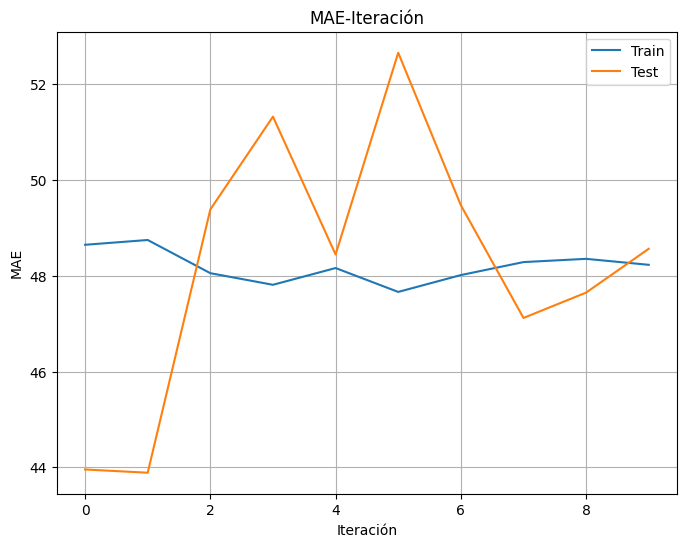

In [39]:
#Grafico
fig, ax =  plt.subplots(figsize=(8, 6))
ax.plot([index for index, value in enumerate(l_mae_train)], [mae for mae in l_mae_train])
ax.plot([index for index, value in enumerate(l_mae_test)], [mae for mae in l_mae_test])
ax.set_title("MAE-Iteración")
ax.set_xlabel("Iteración")
ax.set_ylabel("MAE")
ax.grid(True)
plt.gca().legend(('Train','Test'))
plt.show()